# Maxima Verosimilitud

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [5]:
# Simulación de datos (Alturas de 500 personas)
np.random.seed(42) 
mu_real = 170  # Media de las alturas
sigma_real = 20     # Desviación estándar verdadera
n = 500

Ahora vamos a simular que los datos provienen de una distribucion normal:

In [6]:
datos = np.random.normal(mu_real, sigma_real, n)

In [10]:
datos[:10]

array([179.93428306, 167.23471398, 182.95377076, 200.46059713,
       165.31693251, 165.31726086, 201.58425631, 185.34869458,
       160.61051228, 180.85120087])

## Modelando los datos

Vamos a asumir que los datos siguen un distribucion normal:

$$X_i \sim N(\mu,\sigma)$$


$$L(\mu) = \prod_{i=1}^{n} P(x_i; \mu)$$

$$L(\mu) = \prod_{i=1}^{n} \left[ \left( \frac{1}{\sqrt{2\pi\sigma^2}} \right) \times \exp\left( -\frac{(x_i - \mu)^2}{2\sigma^2} \right) \right]$$

En este caso la log-verosimilitud obtiene la siguiente expresión:

$$
\ell(\mu) = -\frac{n}{2} \ln(2\pi\sigma^2) - \frac{1}{2\sigma^2} \sum_{i=1}^{n} (x_i - \mu)^2
$$

In [ ]:
#  Definición de la función de Log-Verosimilitud
def log_verosimilitud(mu, sigma, x):
    n = len(x)
    # Aplicando logaritmo a la fórmula de la imagen:
    # El producto se vuelve suma y el exp desaparece
    termino_constante = - (n / 2) * np.log(2 * np.pi * sigma**2)
    termino_variable = - (1 / (2 * sigma**2)) * np.sum((x - mu)**2)
    return termino_constante + termino_variable

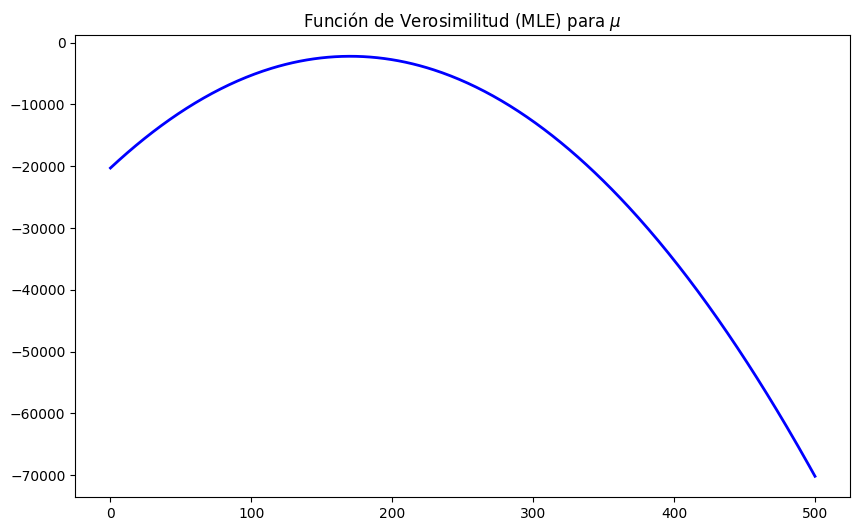

In [19]:
# 3. Preparar el gráfico variando mu
rango_mu = np.linspace(0, 500, 500) # Probamos valores de mu entre 160 y 180
log_vals = [log_verosimilitud(m, sigma_real, datos) for m in rango_mu]

# Encontrar el máximo estimado (MLE)
mu_mle = rango_mu[np.argmax(log_vals)]

# Gráfico
plt.figure(figsize=(10, 6))
plt.plot(rango_mu, log_vals, label='Log-Verosimilitud', color='blue', lw=2)
plt.title('Función de Verosimilitud (MLE) para $\mu$')
plt.show()

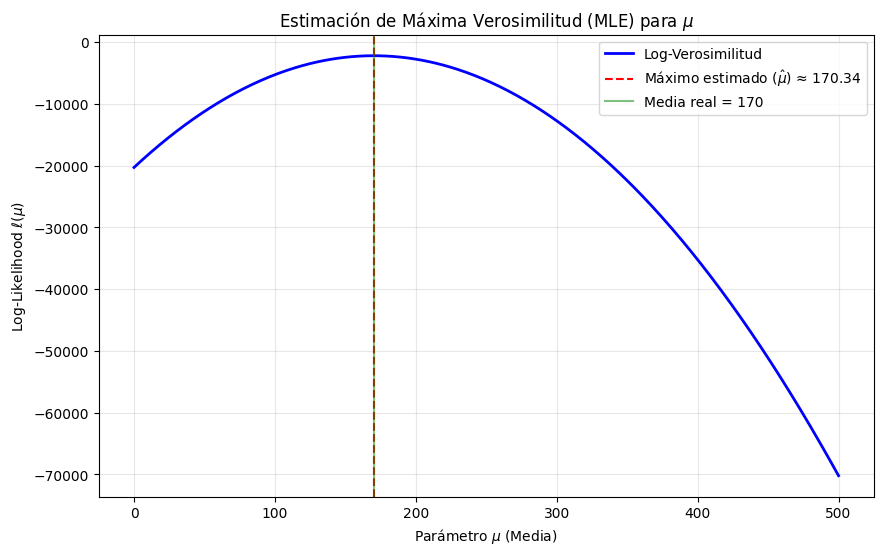

El valor estimado de mu que maximiza la verosimilitud es: 170.3407
La media aritmética de los datos es: 170.1368


In [22]:
plt.figure(figsize=(10, 6))
plt.plot(rango_mu, log_vals, label='Log-Verosimilitud', color='blue', lw=2)
plt.axvline(mu_mle, color='red', linestyle='--', label=f'Máximo estimado ($\hat{{\mu}}$) ≈ {mu_mle:.2f}')
plt.axvline(mu_real, color='green', alpha=0.5, label=f'Media real = {mu_real}')

plt.title('Estimación de Máxima Verosimilitud (MLE) para $\mu$')
plt.xlabel('Parámetro $\mu$ (Media)')
plt.ylabel('Log-Likelihood $\ell(\mu)$')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"El valor estimado de mu que maximiza la verosimilitud es: {mu_mle:.4f}")
print(f"La media aritmética de los datos es: {np.mean(datos):.4f}")